# Beispiel 1: Soziale Beeinflussung

Eben haben wir uns die Definition von Klassen allgemein angeschaut und eingeübt. Ich möchte nun anhand von zwei Beispielen aufzeigen, wie man ABM in einem objektorientierten Programmierstil umsetzen kann. Dabei spielt der Inhalt der Beispielsimulationen - wie so oft - weniger eine Rolle als die Art und Weise, wie diese umgesetzt werden. Im ersten Beispiel schauen wir uns eine relativ arbiträre und einfache Simulation sozialer Beeinflussung an. Dabei soll v.a. die das Programmieren der Methoden aus der Sicht der Agenten, der Zugriff "auf sich selbst" und "andere" Agenten, demonstriert werden.

In dieser Beispielsimulation, geht es darum, dass sich Agenten nach bestimmten Bedingungen "Freunde" aus der Population aussuchen und ihre Meinung von ihren Freunden beeinflusst wird. Wir schauen dann, ob es einen Unterschied für das Meinungspektrum auf der Makroebene macht, wie Agenten sich ihre Freunde aussuchen. Wie gesagt, der Inhalt ist in diesem ersten Beispiel etwas "random", es geht aber v.a. darum, schrittweise zu zeigen, wie man bestimmte "Handlungen" und "Interaktionen" als Methoden, bei denen Agenten auf sich selbst und andere zugreifen, implementiert. Wir werden die Agenten-Klasse im Folgenden schrittweise implementieren.

Die Agenten-Klasse verfügt über vier Attribute:
1. `opinion`: Eine Meinung repräsentiert als Zahl. Wird bei der Erstellung als Parameter übergeben.
2. `tolerance`: Repräsentiert, wie weit eine fremde Meinung von der eigenen Meinung entfernt sein darf, um als akzeptabel zu gelten.
3. `friends`: Eine Liste, in die später als Freunde klassifizierte Agenten eingespeichert werden.
4. `opinion_history`: Liste, in die später in jedem Zeitschritt die eigene Meinung abgelegt wird, um nach der Simulation die Meinung des Agenten im Zeitverlauf nachvollziehen zu können. Ist zu Beginn nur mit der initialen Meinung befüllt.

Die 4 Attribute werden bei der Definition der Klasse innerhalb der Methode `__init__()` festgelegt:

```python
class Agent:
    def __init__(self, opinion):
        self.opinion = opinion
        self.tolerance = 0.2
        self.friends = []
        self.opinion_history = [self.opinion]
```

Nun erweitere ich die Klasse `Agent` um eine erste Methode namens `get_random_friend()`. Diese Methode soll den Agenten ermöglichen, sich zufällig "Freunde" aus der Population "auszusuchen" und in ihrer Freundesliste `friends` zu speichern. Die Populationsliste wird "von außen" als Parameter dem Agenten bzw. der Agenten-Methode `get_random_friend()` übergeben.

```python
    def get_random_friend(self, population):
        
        # Agenten zufällig aus Population ziehen
        friend = random.choice(population)
        
        # Gezogenen Agenten an eigene Freundesliste anhängen
        self.friends.append(friend)
```

Wichtig ist hier zu verstehen, dass der als Agent ausgesuchte `friend` zwar nun in der eigenen Liste `friends` existiert, er existiert aber zugleich auch weiterhin in der Liste `population`. In beiden Listen befinden sich "Zeiger" auf ein und dasselbe Objekt. Wird eine Änderung an einem Agenten in der eigenen Freundesliste vorgenommen wird, wird diese auch in der Liste `population` wirksam und umgekehrt - weil es sich eben um dasselbe Objekt handelt, das in beiden Listen angesiedelt ist.

Nun erweitern wir die Methode `get_random_friend()` um weitere Funktionalitäten. Da der Agent selbst auch in der Populationsliste `population` existiert, sollte er, bevor er sich mit dem zufällig gezogenen Agenten "anfreundet", überprüfen, ob er sich da nicht gerade selbst als Freund ausgesucht hat. Bevor der neue Freund also der Freundesliste angehängt wird, wird sichergestellt, dass `friend` nicht gleich `self` d.h. `friend != self` ist:

```python
    def get_random_friend(self, population):
        
        # Agenten zufällig aus Population ziehen
        friend = random.choice(population)
        
        # wenn man das nicht selbst ist
        if friend != self:
            
            # Gezogenen Agenten an eigene Freundesliste anhängen
            self.friends.append(friend)
```

Da ein Agent öfter nach neuen Freunden gucken wird, kann es u.U. sein, dass er sich zweimal mit demselben Agenten anfreunden möchte. Auch das wollen wir verhindern. Daher guckt der Agent nun nicht nur danach, dass der neue Freund nicht eigentlich er selbst ist, sondern auch, ob der neue Freund nicht schon in der Friendzone ist. Nur wenn `friend not in self.friends` ist, wird `friend` auch in die Freundesliste aufgenommen:

```python
    def get_random_friend(self, population):
        
        # Agenten zufällig aus Population ziehen
        friend = random.choice(population)
        
        # wenn man das nicht selbst ist
        if friend != self:
            
            # Wenn noch nicht in Freundesliste
            if friend not in self.friends:
            
                # Gezogenen Agenten an eigene Freundesliste anhängen
                self.friends.append(friend)
```

Wir wollen annehmen, dass Freundschaft auf Gegenseitigkeit beruht. Daher erweitern wir die Methode nun so, dass der handelnde d.h. einen Freund aussuchende Agent nicht nur seinen neuen Freund in die eigene Freundesliste schreibt, sondern auch sich selbst bei seinem neuen Freund in die Freundesliste. Der Agent greift also auf die Freundesliste seines neuen Freundes zu und fügt sich dort mit `friend.friends.append(self)` selbst hinzu: 

```python
    def get_random_friend(self, population):
        
        # Agenten zufällig aus Population ziehen
        friend = random.choice(population)
        
        # wenn man das nicht selbst ist
        if friend != self:
            
            # Wenn noch nicht in Freundesliste
            if friend not in self.friends:
            
                # Gezogenen Agenten an eigene Freundesliste anhängen
                self.friends.append(friend)
                
                # Sich selbst beim neuen Freund in die Freundesliste einfügen
                friend.friends.append(self)
```

Auch hier muss beachtet werden, dass die Änderung, die der Agent an seinem Freund vornimmt, indem er sich selbst bei diesem einträgt, dauerhaft und global ist. Jede Agenten-Instanz existiert genau einmal, es können jedoch für jede Agenten-Instanz mehrere Zeiger auf diese Instanz existieren. Verändert ein Agent etwas an einem anderen Agenten, indem er über einen "Zeiger" auf diesen zugreift, dann ist dieser andere Agent eben verändert - egal unter welchem Variablennamen oder über welche Liste gerade auf diesen veränderten Agenten zugegriffen wird.

Der Agent möchte nicht nur mit einem zufällig ausgewählten Agenten befreundet sein, sondern auch mit Agenten, die ihm ähnlich sind. In der nächsten Methode namens `get_friends_like_me()` sucht ein Agent daher nach Freunden, die eine Meinung aufweisen, die sich in einem Toleranzbereich um die eigene Meinung befindet. Dazu durchsucht der Agent diesmal die gesamte Population nach möglichen Freunden. Für jeden Agenten in dieser Population wird evaluiert, ob die Meinung im Toleranzbereich liegt, also maximal den Betrag des Attributs `tolerance` von der eigenen Meinung abweicht.

Natürlich überprüft der Agent auch hier wieder, ob der potentielle neue Freund nicht eigentlich er selbst ist und ob dieser nicht bereits in der eigenen Freundesliste ist. Und schließlich beruht auch hier Freundschaft auf Gegenseitigkeit und er schreibt auch sich selbstverständlich selbst bei seinem neuen Freund in die Freundesliste.

```python
    def looking_for_friends_like_me(self, population):
        
        # für jeden Agenten in Population
        for agent in population:
            
            # Wenn man das nicht selbst ist und der Agent auch noch nicht in Freundesliste
            if agent != self and agent not in self.friends:
                
                # Berechnen, ob die Meinung des potentiellen Freundes im eigenen Toleranzbereich liegt
                if abs(agent.opinion - self.opinion) <= self.tolerance:
                    
                    # neuen Freund hinzufügen
                    self.friends.append(agent)
                    
                    # sich selbst bei neuem Freund einschreiben
                    friend.friends.append(self)

```

Die nächste Methode namens `change_my_mind()` bewirkt die Beeinflussung der Meinung des Agenten durch die Meinung eines befreundeten Agenten. Der Agent sucht sich, wenn er mindestens einen Freund in der Freundesliste hat, einen zufälligen Agenten aus der Freundesliste aus, berechnet das arithmetische Mittel aus der eigenen und der Meinung des Freundes und übernimmt schließlich diese Durchschnittsmeinung als neue eigene Meinung:

```python
    def change_my_mind(self):
        
        # Wenn man mindestens einen Freund hat
        if len(self.friends) > 0:
            
            # Einen zufälligen Freund aussuchen
            influencer = random.choice(self.friends)
            
            # neue Meinung berechnen
            self.opinion = (self.opinion + influencer.opinion) / 2
```

In einer letzten Methode namens `store_opinion()` heftet der Agent seine aktuelle Meinung `opinion` an seinen persönlichen Meinungspeicher `opinion_history`:

```python
    def store_opinion(self):
        self.opinion_history.append(self.opinion)
```

Unten setze ich nun die gesamte Definition der Klasse zusammen:

In [223]:
import random

class Agent:
    def __init__(self, opinion):
        self.opinion = opinion
        self.tolerance = 0.1
        self.friends = []
        self.opinion_history = []
    
    
    def get_random_friend(self, population):
        
        # Agenten zufällig aus Population ziehen
        friend = random.choice(population)
        
        # wenn man das nicht selbst ist
        if friend != self:
            
            # Wenn noch nicht in Freundesliste
            if friend not in self.friends:
            
                # Gezogenen Agenten an eigene Freundesliste anhängen
                self.friends.append(friend)
                
                # Sich selbst beim neuen Freund in die Freundesliste einfügen
                friend.friends.append(self)
    
    
    def get_friends_like_me(self, population):
        
        # für jeden Agenten in Population
        for agent in population:
            
            # Wenn man das nicht selbst ist und der Agent auch noch nicht in Freundesliste
            if agent != self and agent not in self.friends:
                
                # Berechnen, ob die Meinung des potentiellen Freundes im eigenen Toleranzbereich liegt
                if abs(agent.opinion - self.opinion) <= self.tolerance:
                    
                    # neuen Freund hinzufügen
                    self.friends.append(agent)
                    
                    # sich selbst bei neuem Freund einschreiben
                    agent.friends.append(self)
    
    
    def change_my_mind(self):

        # Wenn man mindestens einen Freund hat
        if len(self.friends) > 0:

            # Einen zufälligen Freund aussuchen
            influencer = random.choice(self.friends)

            # neue Meinung berechnen
            self.opinion = (self.opinion + influencer.opinion) / 2
    
    
    def store_opinion(self):
        self.opinion_history.append(self.opinion)

Die Definition der Klassen, so wie wir es oben gerade getan haben, erfolgt typischerweise am Anfang eines Skriptes. Nach der Definition der benötigten Klassen folgt die Initialisierung der Simulation. Unten folgt nun ein typischer Vorgang, um die Simulation zu initialisieren. Innerhalb der Initialisierung wird zunächst eine Population mit Agenten-Instanzen erstellt. Danach efolgt ein weiterer Initialisierungsschritt, in welchem alle Agenten mithilfe der Methode `get_friends_like_me()` nach ihren Freunden suchen.

In [224]:
##### INITIALISIERUNG #####

# leere Populationsliste erstellen
population = []

# Agenten erstellen & an Population hängen
for i in range(50):
    agent = Agent(random.random())
    population.append(agent)

# Agenten Freunde suchen lassen
for agent in population:
    agent.get_friends_like_me(population)

Erst jetzt beginnt der eigentliche Simulationsloop, in welchem in jedem Zeitschritt die gesamte Population nacheinander zum handeln gebracht wird d.h. jeder Agent verändert die eigene Meinung und speichert sie ab.

In [225]:
##### SIMULATIONS-LOOP #####

# für jeden Zeitschritt
for tick in range(500):
    
    # für jeden Agenten in Population
    for agent in population:
        
        # Handeln!
        agent.change_my_mind()
        agent.store_opinion()

Nachdem die Simulation durchgelaufen ist, können wir die Meinungen aller Agenten im Zeitverlauf plotten. Dazu erstelle ich die benötigten Matplotlib-Objekte und zeichne dann für jeden Agenten dessen Datenreihe `opinion_history` ein:

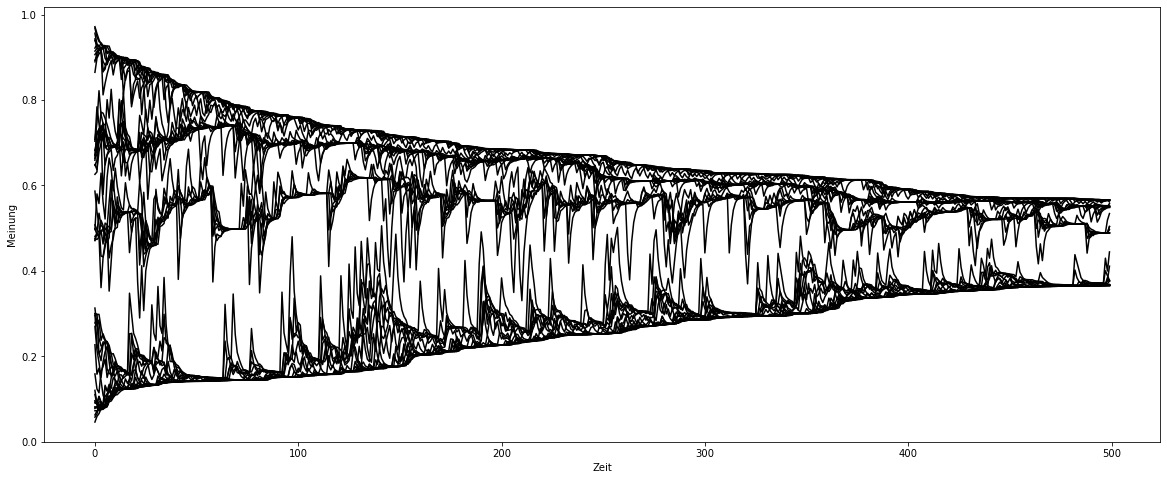

In [226]:
from matplotlib import pyplot as plt

# Matplotlib-Objekte erstellen und modifizieren
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
ax.set(xlabel="Zeit",ylabel="Meinung")

# für jeden Agenten in Population
for agent in population:
    # Meinungsverlauf auf *ax* zeichnen
    ax.plot(agent.opinion_history, color="black")
plt.show()

Wir sehen, es gibt verschiedene Meinungsstränge, welchse sich tendenziell aufeinander zu bewegen. Das Ergebnis interessiert an dieser Stelle aber nicht wirklich. 

Nun variiere ich die Simulationsbedingungen und lasse die Agenten nicht nur nach ähnlichen Freunden suchen, sondern mit der Methode `get_random_friend()` auch einen Zufallsfreund aussuchen:

In [211]:
##### INITIALISIERUNG #####

# leere Populationsliste erstellen
population = []

# Agenten erstellen & an Population hängen
for i in range(50):
    agent = Agent(random.random())
    population.append(agent)

# Agenten Freunde suchen lassen
for agent in population:
    agent.get_friends_like_me(population)
    agent.get_random_friend(population)
    
    
    
##### SIMULATIONS-LOOP #####

# für jeden Zeitschritt
for tick in range(500):
    
    # für jeden Agenten in Population
    for agent in population:
        
        # Handeln!
        agent.change_my_mind()
        agent.store_opinion()
    

Das Ergebnis sehen wir wieder unten. Im Vergleich zur anderen Simulation fällt auf, dass die Angleichung der Meinungen nun wesentlich schneller ging. Besteht also nicht nur eine Vernetzung unter ähnlichen Agenten, sondern gibt es auch Kontakte zwischen sich eigentlich unähnlichen Agenten, führt das zu einer schnelleren Vereinheitlichung der Agenten - zumindest in diesem Modell. 

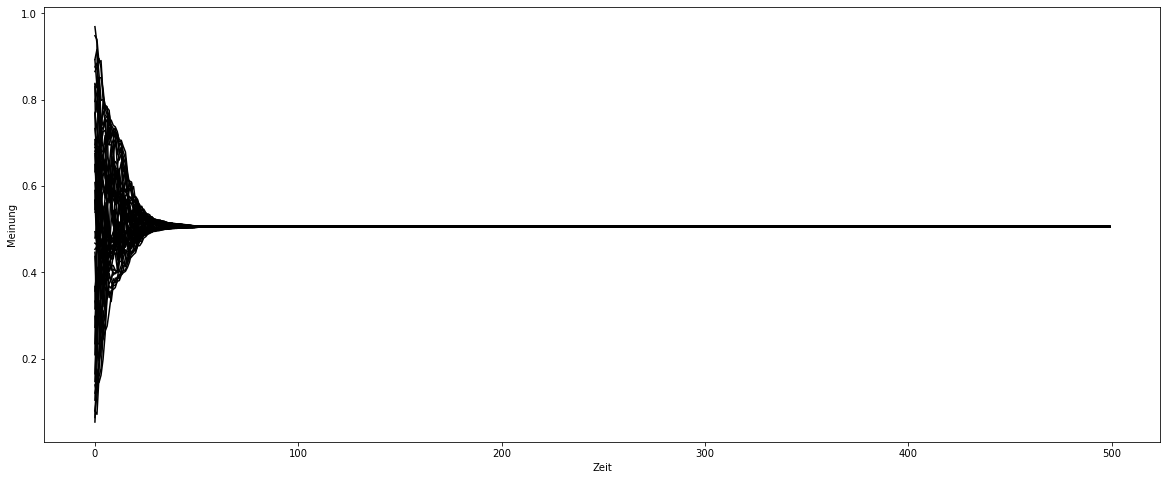

In [212]:
# Matplotlib-Objekte erstellen und modifizieren
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
ax.set(xlabel="Zeit",ylabel="Meinung")

# für jeden Agenten in Population
for agent in population:
    # Meinungsverlauf auf *ax* zeichnen
    ax.plot(agent.opinion_history, color="black")